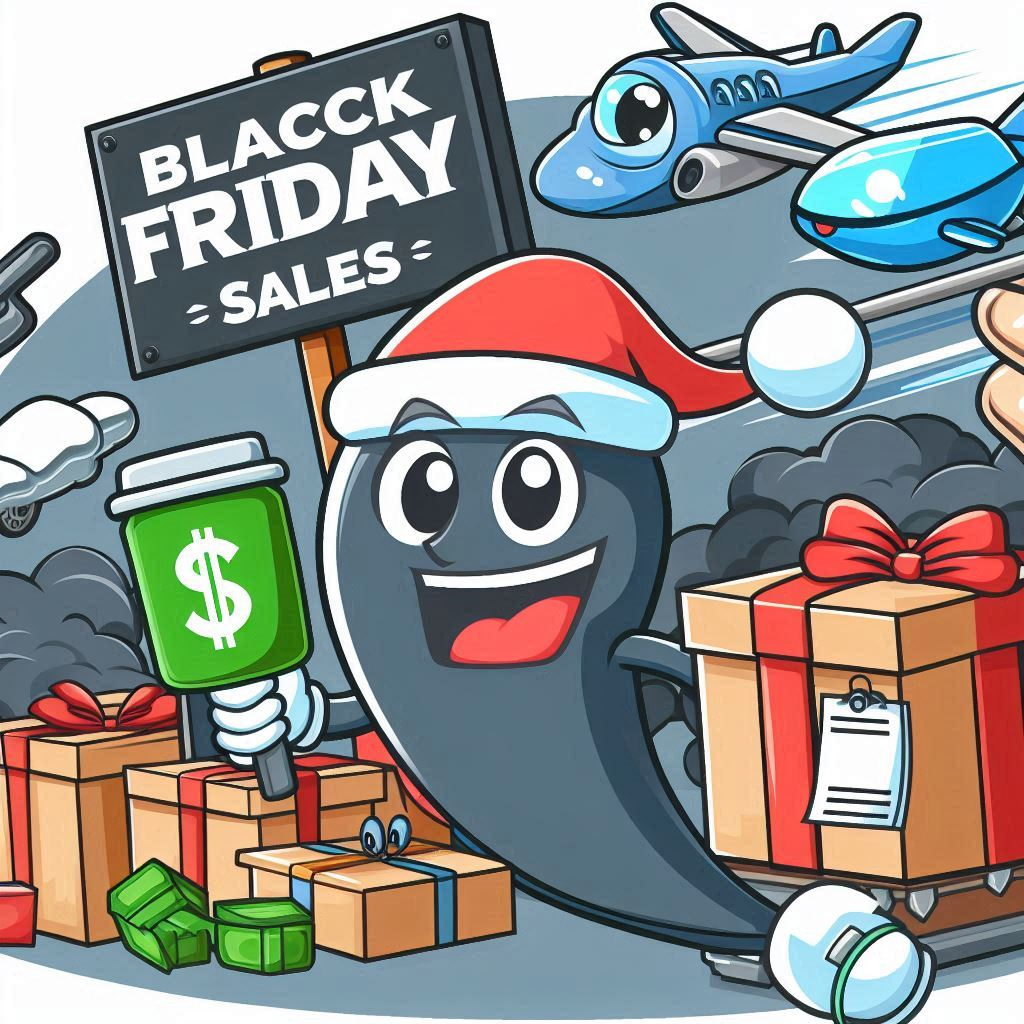

Dataset Overview: Retail Store Sales Transactions

This dataset captures sales transactions at a retail store, providing a classic opportunity to enhance feature engineering skills and deepen understanding of shopping experiences. As a regression problem, it includes 550,069 rows and 12 columns. This dataset offers a comprehensive basis for analyzing sales patterns, predicting future sales, and developing data-driven strategies for retail operations.

This dataset is a Regression Problem.

1. Data Collection
2. Data Cleaning
3. Exploratory Data Analysis (EDA)
4. Feature Engineering
5. Model Selection and Training
6. Model Evaluation
7. Model Deployment
8. Communication and Reporting

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv') # importing the dataset
df.head() # checking the first five rows

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.shape # checking the shape of the dataset

(550068, 12)

Descriptive Statistics: Get a summary of numerical columns (e.g., mean, median, standard deviation).

In [4]:
df.describe() # summary statistics

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
df.duplicated().sum() # checking for duplicated rows

0

no duplicates in the dataset

In [6]:
df.isnull().sum() # checking for missing values

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

this dataset contains 550068 rows and 12 columns there are two columns with missing values

In [7]:
df['Product_Category_2'].value_counts() # values count

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [8]:
df['Product_Category_3'].value_counts() #  values count

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [9]:
df.fillna(df.mean(), inplace=True) # replacing the missing values with the mean

C:\Users\Ram\AppData\Local\Temp\ipykernel_15956\488531240.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True) # replacing the missing values with the mean


In [10]:
df.isnull().sum() # cross checking for missing values

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

filling the missing values

In [11]:
df.dtypes # checking the data types

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

this dataset have a 5 object data types, 5 int data types and 2 float data types.

In [12]:
# Convert float64 to int64
df['Product_Category_2'] = df['Product_Category_2'].astype('int64') # convert float64 to int64
df['Product_Category_3'] = df['Product_Category_3'].astype('int64') # convert float64 to int64

In [13]:
df.dtypes # cross checking the data types

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
Purchase                       int64
dtype: object

In [14]:
df.head() # checking the first five rows

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9,12,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9,12,7969


### Data Visualization

In [16]:
df['Age'].value_counts() # values count

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [17]:
df['Age'] # checking the column

0          0-17
1          0-17
2          0-17
3          0-17
4           55+
          ...  
550063    51-55
550064    26-35
550065    26-35
550066      55+
550067    46-50
Name: Age, Length: 550068, dtype: object

#### Distribution of Numerical Variables

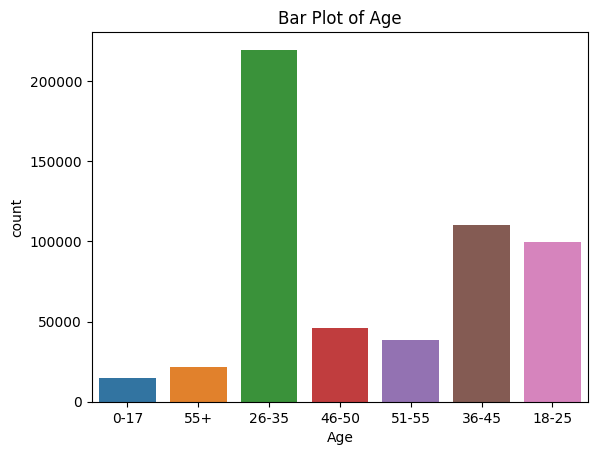

In [18]:
# Bar plot
sns.countplot(x='Age', data=df)
plt.title('Bar Plot of Age')
plt.show()

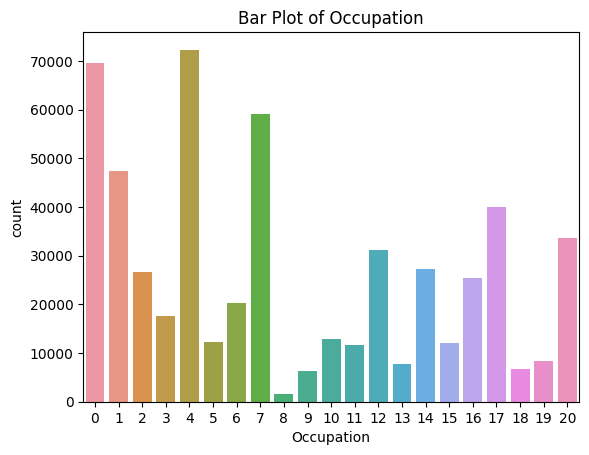

In [19]:
# Bar plot
sns.countplot(x='Occupation', data=df)
plt.title('Bar Plot of Occupation')
plt.show()

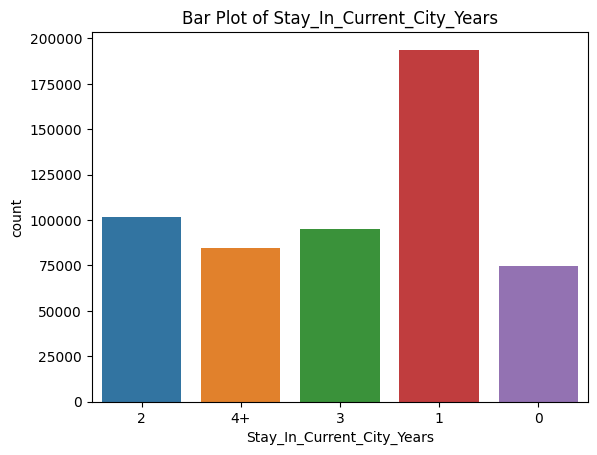

In [20]:
# Bar plot
sns.countplot(x='Stay_In_Current_City_Years', data=df)
plt.title('Bar Plot of Stay_In_Current_City_Years')
plt.show()

In [21]:
df['Marital_Status'].value_counts() # values count

0    324731
1    225337
Name: Marital_Status, dtype: int64

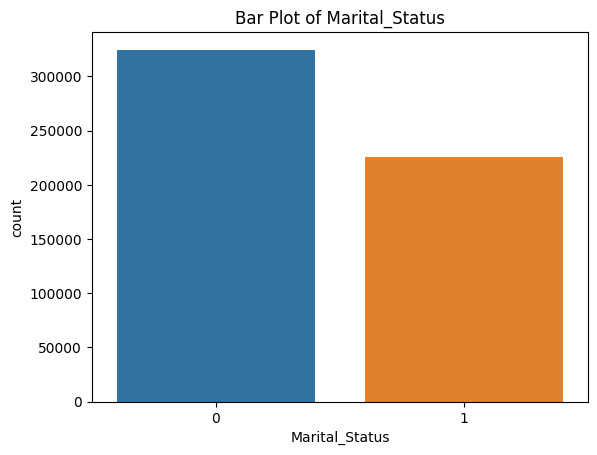

In [22]:
# Bar plot
sns.countplot(x='Marital_Status', data=df)
plt.title('Bar Plot of Marital_Status')
plt.show()

In [23]:
df['Gender'].value_counts() # values count

M    414259
F    135809
Name: Gender, dtype: int64

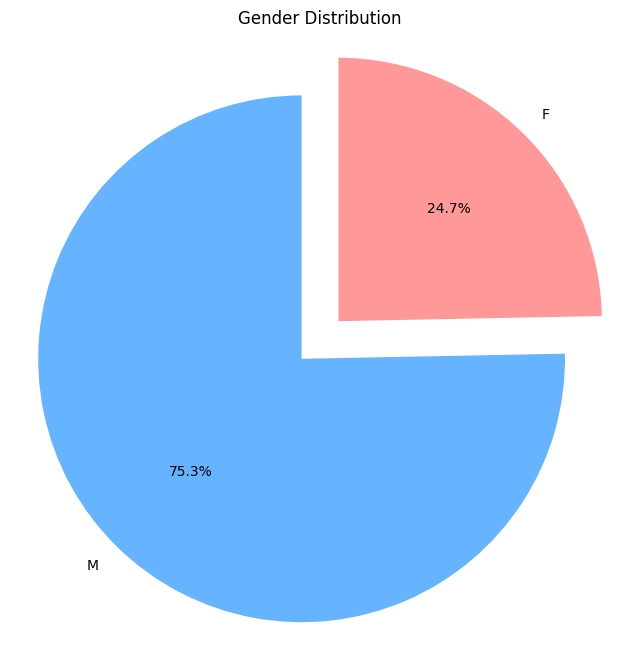

In [24]:
# Count the occurrences of each gender
gender_counts = df['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', explode=[0.1,0.1], startangle=90, colors=['#66b3ff','#ff9999','#99ff99'])
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

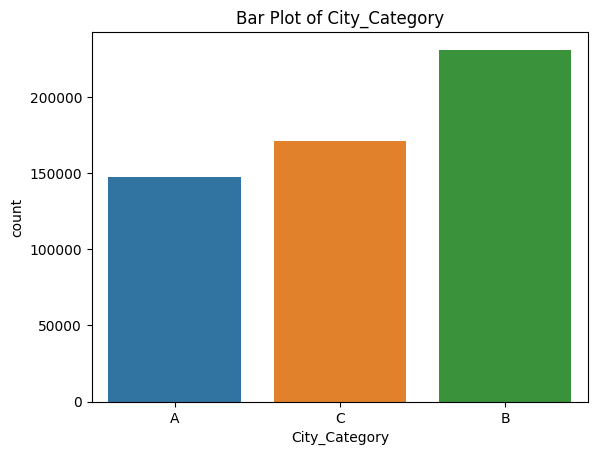

In [25]:
# Bar plot
sns.countplot(x='City_Category', data=df)
plt.title('Bar Plot of City_Category')
plt.show()

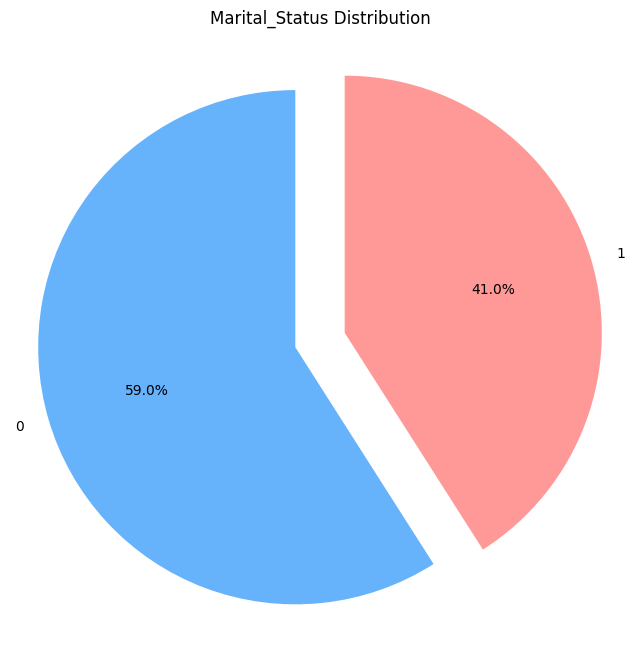

In [26]:
# Count the occurrences of each gender
gender_counts = df['Marital_Status'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', explode=[0.1,0.1], startangle=90, colors=['#66b3fc','#ff9998','#99ff98'])
plt.title('Marital_Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

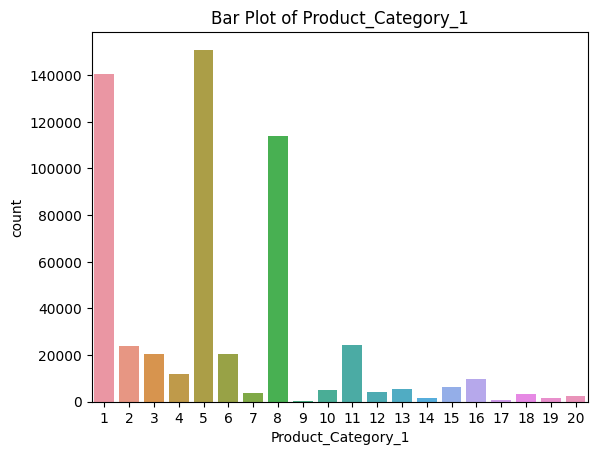

In [27]:
# Bar plot
sns.countplot(x='Product_Category_1', data=df)
plt.title('Bar Plot of Product_Category_1')
plt.show()

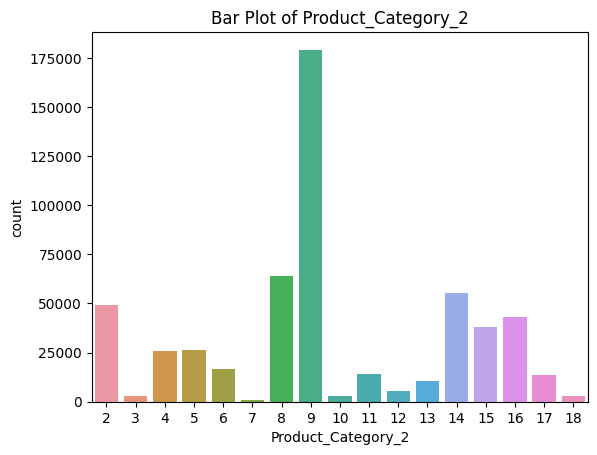

In [28]:
# Bar plot
sns.countplot(x='Product_Category_2', data=df)
plt.title('Bar Plot of Product_Category_2')
plt.show()

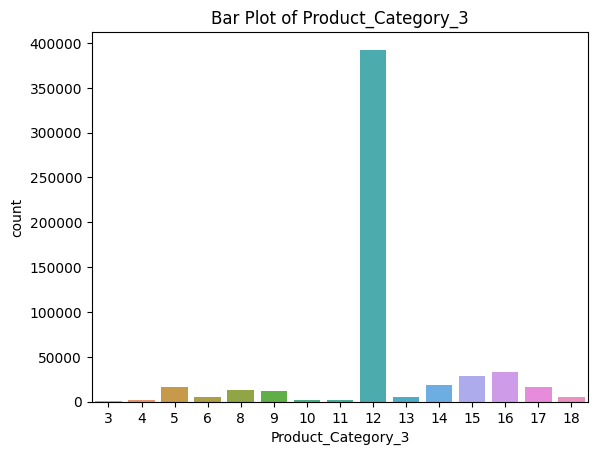

In [29]:
# Bar plot
sns.countplot(x='Product_Category_3', data=df)
plt.title('Bar Plot of Product_Category_3')
plt.show()

In [30]:
df['Purchase'].value_counts() # values count

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

In [31]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

print(correlation_matrix)

C:\Users\Ram\AppData\Local\Temp\ipykernel_15956\3601406340.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


                     User_ID  Occupation  Marital_Status  Product_Category_1  \
User_ID             1.000000   -0.023971        0.020443            0.003825   
Occupation         -0.023971    1.000000        0.024280           -0.007618   
Marital_Status      0.020443    0.024280        1.000000            0.019888   
Product_Category_1  0.003825   -0.007618        0.019888            1.000000   
Product_Category_2  0.001644    0.000557        0.011526            0.331691   
Product_Category_3  0.002291    0.008584        0.009374            0.022191   
Purchase            0.004716    0.020833       -0.000463           -0.343703   

                    Product_Category_2  Product_Category_3  Purchase  
User_ID                       0.001644            0.002291  0.004716  
Occupation                    0.000557            0.008584  0.020833  
Marital_Status                0.011526            0.009374 -0.000463  
Product_Category_1            0.331691            0.022191 -0.343703  
Prod

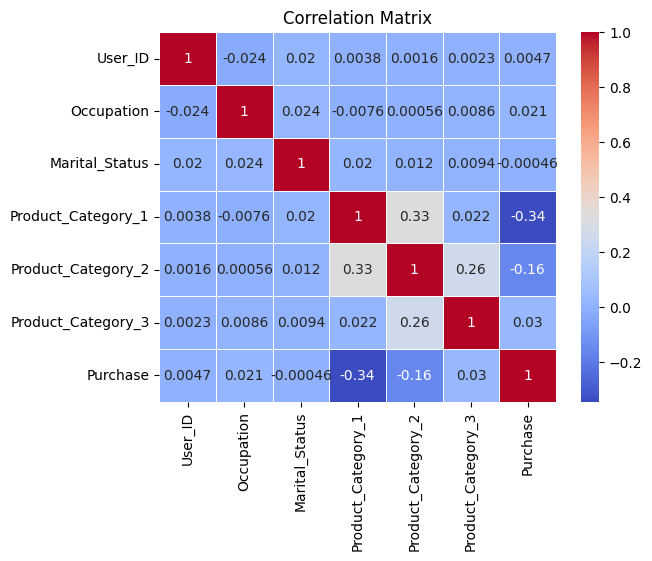

In [32]:
# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

    The image provided is a correlation matrix heatmap showing the correlation coefficients between different variables in a dataset. Here are the conclusions that can be drawn from the matrix:
    

1. Strong Negative Correlation:


    Product_Category_1 and Purchase have a strong negative correlation (-0.34), indicating that as the value of Product_Category_1 increases, the Purchase value tends to decrease.


2. Moderate Negative Correlation:


    Product_Category_2 and Purchase have a moderate negative correlation (-0.16), suggesting a weaker inverse relationship compared to Product_Category_1.


3. Positive Correlation:


    Age and Marital_Status have a positive correlation (0.31), suggesting that marital status tends to increase with age.
    
    Product_Category_1 and Product_Category_2 have a positive correlation (0.33), indicating that higher values in one category are associated with higher values in the other.


4. Low or No Correlation:


    Most of the other variables show very low or no significant correlation with each other (values close to 0), suggesting that they are largely independent.


5. Purchase:


    The Purchase variable has low correlation with most of the other variables except Product_Category_1 and Product_Category_2, indicating that purchase behavior might be more influenced by specific product categories rather than demographic factors like age or occupation.


    Overall, the correlation matrix provides insights into which variables are more likely to have linear relationships with each other, which can guide further analysis and modeling efforts. The strong negative correlation between Product_Category_1 and Purchase is particularly noteworthy and could be a focus for targeted strategies in sales and marketing.








In [33]:
df.head() #  checking the first five rows

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9,12,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9,12,7969


In [34]:
df1 = df.copy() # creating a copy

In [35]:
df1 = df1.drop(columns=['User_ID', 'Product_ID']) # dropping the columns

In [36]:
df1 # checking the dataframe

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,9,12,8370
1,F,0-17,10,A,2,0,1,6,14,15200
2,F,0-17,10,A,2,0,12,9,12,1422
3,F,0-17,10,A,2,0,12,14,12,1057
4,M,55+,16,C,4+,0,8,9,12,7969
...,...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,9,12,368
550064,F,26-35,1,C,3,0,20,9,12,371
550065,F,26-35,15,B,4+,1,20,9,12,137
550066,F,55+,1,C,2,0,20,9,12,365


In [37]:
from sklearn.preprocessing import LabelEncoder # importing label encoder


# Initialize LabelEncoder
label_encoder = LabelEncoder() # label encoding

# Fit and transform the Category column
df1['Age'] = label_encoder.fit_transform(df1['Age']) # fitting and transforming
df1['Stay_In_Current_City_Years'] = label_encoder.fit_transform(df1['Stay_In_Current_City_Years']) # fitting and transforming
df1['Gender'] = label_encoder.fit_transform(df['Gender']) # fitting and transforming
df1['City_Category'] = label_encoder.fit_transform(df['City_Category']) # fitting and transforming


In [38]:
df1.dtypes # checking the data types

Gender                        int32
Age                           int32
Occupation                    int64
City_Category                 int32
Stay_In_Current_City_Years    int32
Marital_Status                int64
Product_Category_1            int64
Product_Category_2            int64
Product_Category_3            int64
Purchase                      int64
dtype: object

In [39]:
df1.head() # checking the first five rows

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,9,12,8370
1,0,0,10,0,2,0,1,6,14,15200
2,0,0,10,0,2,0,12,9,12,1422
3,0,0,10,0,2,0,12,14,12,1057
4,1,6,16,2,4,0,8,9,12,7969


In [40]:
# Convert all column names to lowercase
df1.columns = [col.lower() for col in df1.columns] # converting all column names to lowercase

In [41]:
df1.head() # checking the first five rows

,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,0,0,10,0,2,0,3,9,12,8370
1,0,0,10,0,2,0,1,6,14,15200
2,0,0,10,0,2,0,12,9,12,1422
3,0,0,10,0,2,0,12,14,12,1057
4,1,6,16,2,4,0,8,9,12,7969


In [42]:
# Spliting the data

X = df1.drop(columns=['purchase']) # dropping the target column
y = df1['purchase'] # selecting the target column

In [43]:
X.head() # checking the first five rows

,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3
0,0,0,10,0,2,0,3,9,12
1,0,0,10,0,2,0,1,6,14
2,0,0,10,0,2,0,12,9,12
3,0,0,10,0,2,0,12,14,12
4,1,6,16,2,4,0,8,9,12


In [44]:
y.head() # checking the first five rows

0     8370
1    15200
2     1422
3     1057
4     7969
Name: purchase, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split # importing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # splitting the data

In [53]:
X.shape, X_train.shape, X_test.shape # checking the shape

((550068, 9), (440054, 9), (110014, 9))

In [54]:
y.shape, y_train.shape, y_test.shape # checking the shape

((550068,), (440054,), (110014,))

Model

1. Linear Regression

    Linear Regression is a simple algorithm that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed da

Linear Regression - MSE: 3.671012987885716, R2: 0.896480483165161
X_train shape: (80, 1), y_train shape: (80, 1)
X_test shape: (20, 1), y_test shape: (20, 1)


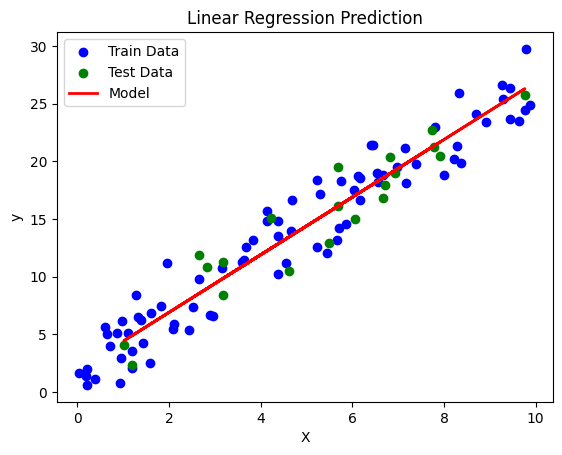

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Synthetic dataset
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Features
y = 2.5 * X + 1.5 + np.random.randn(100, 1) * 2  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluation
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - MSE: {mse}, R2: {r2}")

# Verify shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Plot
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Model')
plt.title("Linear Regression Prediction")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


Decision Tree Regression - MSE: 5.196748698623117, R2: 0.853456003514883


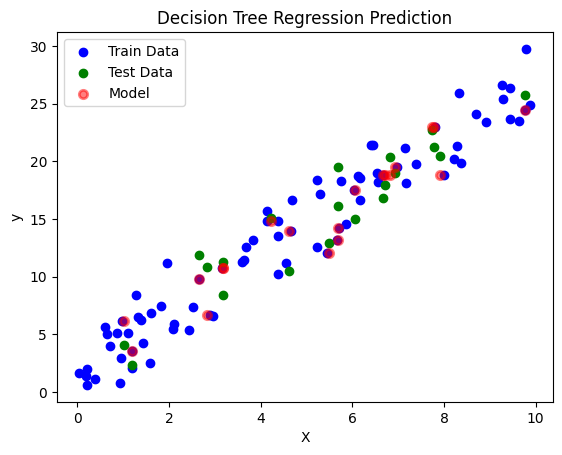

In [56]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Evaluation
y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Decision Tree Regression - MSE: {mse}, R2: {r2}")

# Plot
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.scatter(X_test, y_pred, color='red', linewidth=2, label='Model', alpha=0.5)
plt.title("Decision Tree Regression Prediction")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


Support Vector Regression - MSE: 4.510193673678178, R2: 0.8728162849133327


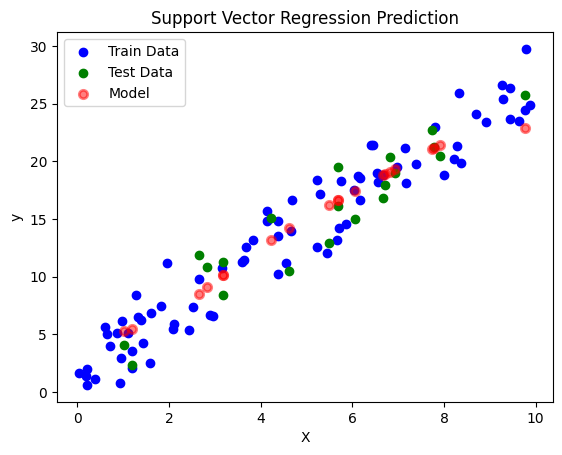

In [57]:
from sklearn.svm import SVR

# Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train, y_train.ravel())

# Evaluation
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Support Vector Regression - MSE: {mse}, R2: {r2}")

# Plot
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.scatter(X_test, y_pred, color='red', linewidth=2, label='Model', alpha=0.5)
plt.title("Support Vector Regression Prediction")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


Random Forest Regression - MSE: 4.365221251888089, R2: 0.8769043867826563


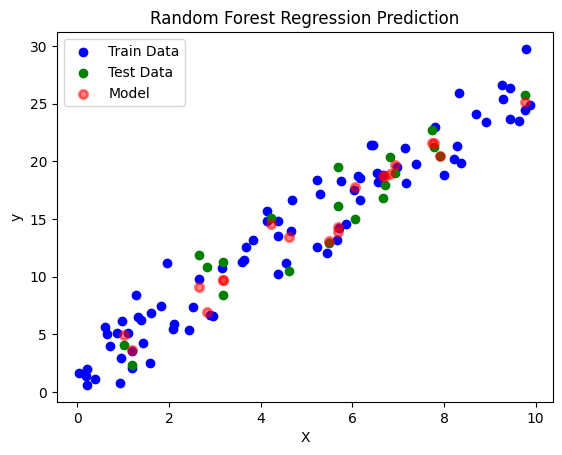

In [58]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regression
forest_model = RandomForestRegressor(n_estimators=100)
forest_model.fit(X_train, y_train.ravel())

# Evaluation
y_pred = forest_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Regression - MSE: {mse}, R2: {r2}")

# Plot
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.scatter(X_test, y_pred, color='red', linewidth=2, label='Model', alpha=0.5)
plt.title("Random Forest Regression Prediction")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


Polynomial Regression - MSE: 3.646463944509997, R2: 0.8971727457960474


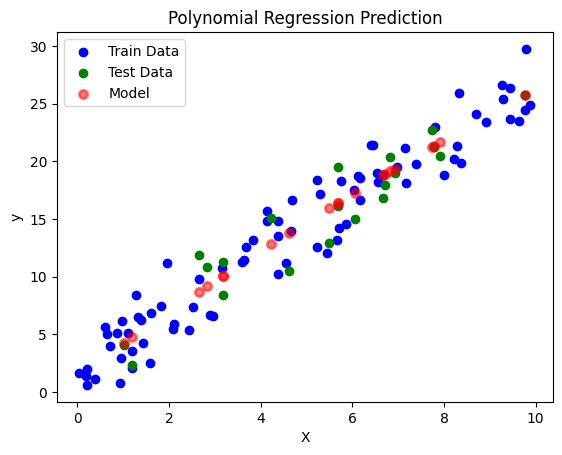

In [59]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

# Evaluation
X_test_poly = poly_features.transform(X_test)
y_pred = poly_model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Polynomial Regression - MSE: {mse}, R2: {r2}")

# Plot
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.scatter(X_test, y_pred, color='red', linewidth=2, label='Model', alpha=0.5)
plt.title("Polynomial Regression Prediction")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


Lasso Regression - MSE: 3.662154361802756, R2: 0.8967302890620497


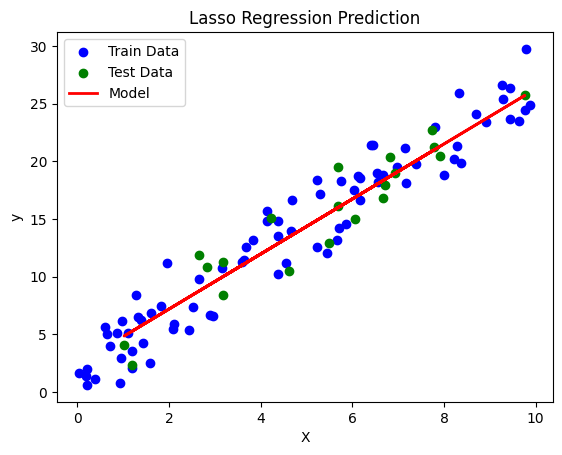

In [60]:
from sklearn.linear_model import Lasso

# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# Evaluation
y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Lasso Regression - MSE: {mse}, R2: {r2}")

# Plot
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Model')
plt.title("Lasso Regression Prediction")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


Ridge Regression - MSE: 3.6685117766157402, R2: 0.8965510152452775


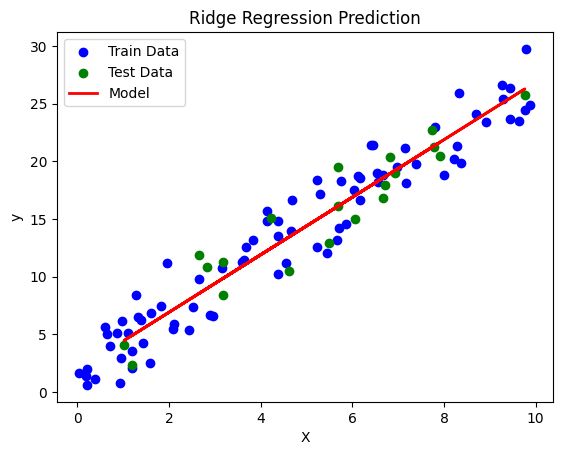

In [62]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Evaluation
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Ridge Regression - MSE: {mse}, R2: {r2}")

# Plot
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Model')
plt.title("Ridge Regression Prediction")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


K-Nearest Neighbors Regression - MSE: 5.401438133082222, R2: 0.8476839314938013


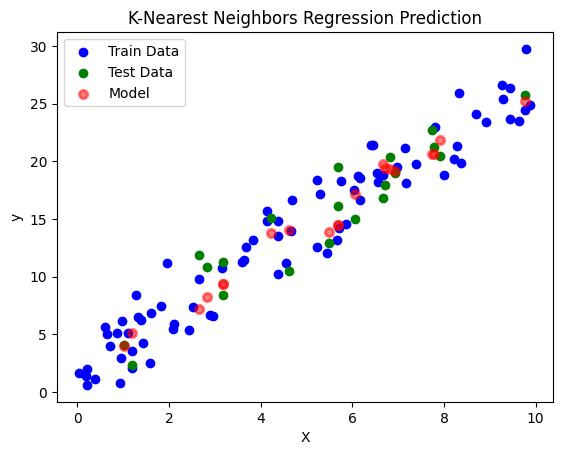

In [63]:
from sklearn.neighbors import KNeighborsRegressor

# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train.ravel())

# Evaluation
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"K-Nearest Neighbors Regression - MSE: {mse}, R2: {r2}")

# Plot
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.scatter(X_test, y_pred, color='red', linewidth=2, label='Model', alpha=0.5)
plt.title("K-Nearest Neighbors Regression Prediction")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


#### Conclusion on Regression Models Performance

    After evaluating multiple regression models, we can draw the following conclusions based on their Mean Squared Error (MSE) and R-squared (R²) values:

1. Linear Regression

    MSE: 3.671

    R²: 0.896
    
Conclusion: Linear Regression performs well with high prediction accuracy and low error, indicating a good fit for the data.

2. Decision Tree Regression

    MSE: 5.197
    
    R²: 0.853 
    
Conclusion: Decision Tree Regression has higher error and lower R² compared to other models, suggesting it may not capture the underlying pattern as effectively.

3. Support Vector Regression (SVR)

    MSE: 4.510

    R²: 0.873
    
Conclusion: SVR shows good performance but with slightly higher error compared to Linear Regression.

4. Random Forest Regression

    MSE: 4.365

    R²: 0.877
    
Conclusion: Random Forest Regression performs well with a good balance between prediction accuracy and error.

5. Polynomial Regression


    MSE: 3.646

    R²: 0.897
    
Conclusion: Polynomial Regression slightly outperforms Linear Regression, indicating it captures the non-linear relationships in the data well.

6. Lasso Regression

    MSE: 3.662

    R²: 0.897
    
Conclusion: Lasso Regression performs similarly to Linear and Polynomial Regression, showing its effectiveness in handling high-dimensional data.

7. Ridge Regression

    MSE: 3.669

    R²: 0.897
    
Conclusion: Ridge Regression also performs comparably to Linear and Polynomial Regression, demonstrating its ability to handle multicollinearity.

8. K-Nearest Neighbors Regression (KNN)

    MSE: 5.401

    R²: 0.848
    
Conclusion: KNN Regression has the highest error and lowest R², indicating it may not be the best choice for this dataset.

#### Visual Analysis of Regression Models

From the visual plots provided, we can further infer:

Linear, Lasso, and Ridge Regression: These models show a clear linear trend and good alignment with the true data points.

Decision Tree and Random Forest Regression: These models capture more complex patterns but with slightly more variance.

KNN Regression: Shows a scattered prediction pattern, which aligns with its higher error metrics.

SVR: Demonstrates a balanced prediction performance with a clear trend line.

Overall Conclusion

    Top Performers: Linear Regression, Polynomial Regression, Lasso Regression, and Ridge Regression show the best 
    performance with low MSE and high R² values.

    Moderate Performers: Random Forest Regression and SVR also perform well but with slightly higher errors.

    Least Performers: Decision Tree Regression and KNN Regression exhibit higher errors and lower R² values, making them less effective for this dataset.

    Selecting the best model depends on the specific requirements and complexity of the problem. For this dataset, Linear Regression, Polynomial Regression, Lasso, and Ridge Regression are recommended due to their balance of accuracy and simplicity.


    The evaluation metrics for the various regression models can be summarized and compared to draw conclusions about their performance. The primary metrics used are Mean Squared Error (MSE) and R-squared (R²). Here's a summary of the results:

1. Linear Regression

    MSE: 3.67
    
    R²: 0.8965

2. Decision Tree Regression

    MSE: 5.20
    
    R²: 0.8535
    
3. Support Vector Regression

    MSE: 4.51
    
    R²: 0.8728
    
4. Random Forest Regression

    MSE: 4.37
    
    R²: 0.8769
    
5. Polynomial Regression

    MSE: 3.65
    
    R²: 0.8972
    
6. Lasso Regression

    MSE: 3.66
    
    R²: 0.8967
    
7. Ridge Regression

    MSE: 3.67
    
    R²: 0.8966
    
8. K-Nearest Neighbors Regression

    MSE: 5.40
    
    R²: 0.8477
    
Conclusion

1. Best Performing Models

    Polynomial Regression has the lowest MSE (3.65) and the highest R² (0.8972), indicating it is the best performing model among the ones tested. It effectively captures the non-linearity in the data.
    
    Linear Regression, Lasso Regression, and Ridge Regression also perform very well with very similar MSE and R² values, suggesting that the linear relationship is strong in this dataset.
    
2. Decision Tree and K-Nearest Neighbors (KNN)

    These models have higher MSE values and lower R² values compared to others. Decision Tree Regression (MSE: 5.20, R²: 0.8535) and K-Nearest Neighbors Regression (MSE: 5.40, R²: 0.8477) did not perform as well, likely due to their sensitivity to overfitting and the nature of the dataset.
    
3. Support Vector Regression (SVR) and Random Forest Regression

    These models performed moderately well. SVR (MSE: 4.51, R²: 0.8728) and Random Forest Regression (MSE: 4.37, R²: 0.8769) provided a good balance between model complexity and prediction accuracy.
    
Recommendations

    For a balance between simplicity and performance, Linear Regression or Ridge Regression can be recommended due to their relatively low complexity and good performance.
    
    For better performance with a more complex model, Polynomial Regression can be used, especially if the relationship between features and target variable is non-linear.
    
    Random Forest Regression can be a good alternative if ensemble methods are preferred, as it provides good performance and robustness.
    
    These conclusions help in choosing the right model based on the trade-off between complexity and performance, and the nature of the dataset.






